# Customer Segmentation using K-Means Clustering

### Objective
In this notebook, we will apply **K-Means Clustering** to segment customers based on their annual income and spending score. We will:
- Use the **Elbow Method** to determine the optimal number of clusters.
- Apply **K-Means clustering** to group the data.
- Evaluate clustering performance using the **Silhouette Score**.
- Visualize the clusters using **2D and 3D plots**.

### About the Author
This notebook was created by **Aimal Khan**.
- **Purpose:** To demonstrate K-Means clustering for customer segmentation.
- **Topics Covered:** Data preprocessing, feature scaling, the Elbow Method, K-Means clustering, and evaluation using the Silhouette Score.

Feel free to use and modify this notebook for learning purposes!

We first install necessary Python libraries.

In [14]:
# !pip install numpy pandas matplotlib seaborn scikit-learn

We import the required libraries for data manipulation, clustering, and visualization.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

We load the **Mall Customers Segmentation dataset** from a CSV file and display the first few rows.

In [ ]:
df = pd.read_csv("../datasets/mall-customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We check if there are any missing values in the dataset.

In [17]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


We drop the `CustomerID` column as it is not needed for clustering.

In [18]:
df = df.drop(columns=['CustomerID'])

We convert the `Gender` column into numeric values (`Male = 0`, `Female = 1`).

In [19]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


We select **Age, Annual Income, and Spending Score** as the features for clustering.

In [20]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].values

K-Means is sensitive to different scales, so we standardize the features using **StandardScaler**.

**Formula for Standardization:**
$X_{scaled} = \frac{X - \mu}{\sigma}$

where:
- $X$ is the original feature value.
- $\mu$ is the mean of the feature.
- $\sigma$ is the standard deviation of the feature.

Standardization ensures that all features have **zero mean** and **unit variance**, preventing any single feature from dominating the clustering process.

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

We use the **Elbow Method** to determine the best number of clusters.

**Within-Cluster Sum of Squares (WCSS) Formula:**

$WCSS = \sum_{i=1}^{m} \sum_{k=1}^{K} \mathbb{1}(c^{(i)} = k) ||x^{(i)} - \mu_k||^2$

where:
- $\mu_k$ is the centroid of cluster $k$.
- $x^{(i)}$ is a data point assigned to cluster $k$.

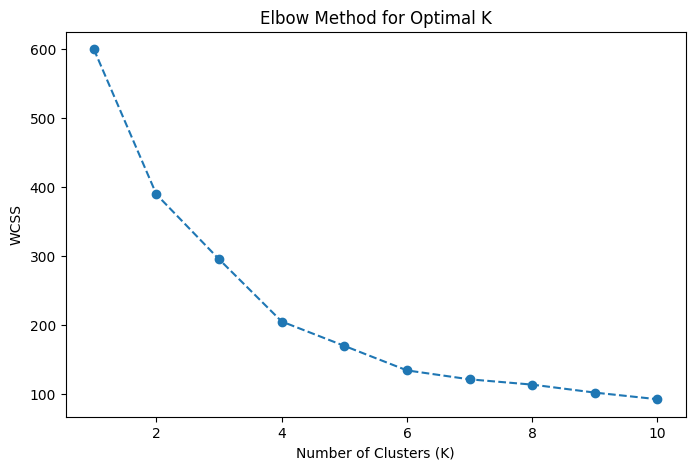

In [22]:
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

We choose the optimal **K = 5** and apply K-Means.

In [23]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
df["Cluster"] = cluster_labels
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,3
3,1,23,16,77,2
4,1,31,17,40,2


We compute the **Silhouette Score** to measure clustering quality.

**Silhouette Score Formula:**
$S = \frac{(b - a)}{\max(a, b)}$
where:
- $a$ is the average intra-cluster distance.
- $b$ is the average nearest-cluster distance.

In [24]:
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score for K={optimal_k}: {silhouette_avg:.4f}")

Silhouette Score for K=5: 0.4085


We visualize customer segments using a **scatter plot**.

- The x-axis represents **Annual Income (k$)**.
- The y-axis represents **Spending Score (1-100)**.
- Different colors represent different clusters.

This helps us understand how customers are grouped based on their spending behavior and income.

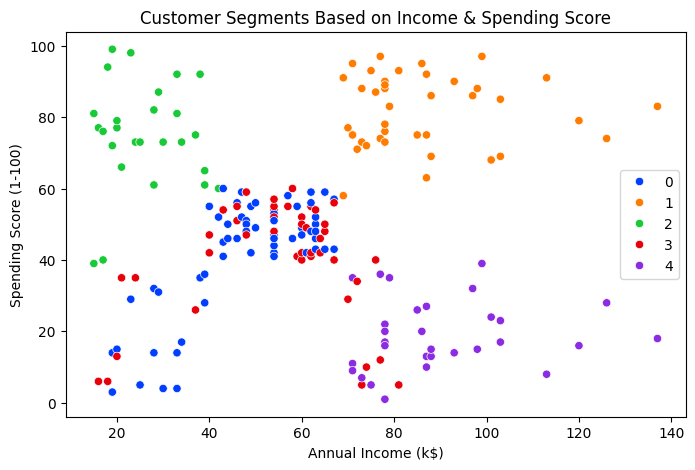

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["Cluster"], palette="bright")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments Based on Income & Spending Score")
plt.legend()
plt.show()


Since we used **three features** (`Age`, `Annual Income`, `Spending Score`), a **3D visualization** helps understand clustering better.

- The x-axis represents **Age**.
- The y-axis represents **Annual Income (k$)**.
- The z-axis represents **Spending Score (1-100)**.
- Different colors represent different clusters.

This 3D visualization provides a more **comprehensive view** of how customers are grouped based on multiple features.

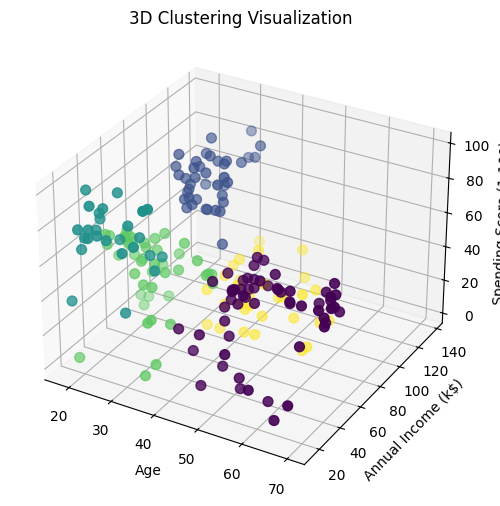

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"], c=df["Cluster"], cmap="viridis", s=50)

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("3D Clustering Visualization")
plt.show()
